## import library

In [141]:
# create jupyter note book
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mtcars = pd.DataFrame()
mtcars = pd.read_csv("./mtcars.csv")

In [142]:
# print head
mtcars.head(3)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [143]:
# print tail
mtcars.tail(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [144]:
# print shape
mtcars.shape

#result (num of rows, num of cols/attributes)

(32, 12)

### 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경변경

In [145]:
mtcars.rename(columns={'Unnamed: 0':'model'}, inplace=True)
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [146]:
#print info
mtcars.info

<bound method DataFrame.info of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4   

In [147]:
# print dtypes
mtcars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [148]:
# print describe
mtcars.describe

<bound method NDFrame.describe of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4 

In [149]:
# print unique value
mtcars['gear'].unique()

array([4, 3, 5])

In [150]:
# print number of gear unique value
mtcars['gear'].nunique()

3

In [151]:
# print number of transmission unique value
mtcars['am'].nunique()

2

## gear, transmission의 경우의 수 조합
* 3C1 * 2C1 = 6
* 6가지 경우의 수 존재
* 각 조합에 몇개의 차량이 존재하는지 확인

In [152]:
# 4 3 5
x_axis = mtcars['gear'].unique()
x_axis.sort()
print(x_axis)
# 1 0
y_axis = mtcars['am'].unique()
y_axis.sort()
print(y_axis)

[3 4 5]
[0 1]


# Gear, Transmission 의 경우의 수 조합별 차량의 개수 막대 그래프
* crosstab method 를 사용하지 않는 방법

<BarContainer object of 6 artists>

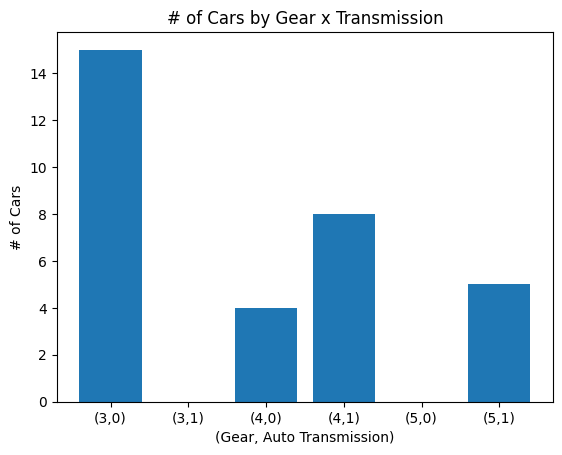

In [153]:
table_x = []
table_y = []
for x in x_axis:
    for y in y_axis:
        count_rows = len(mtcars[(mtcars['gear'] == x) & (mtcars['am'] == y)])
        table_x.append(f'({x},{y})')
        table_y.append(count_rows)

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.bar(table_x, table_y)

* crosstab method 를 사용하는 방법
[TODO!!]

<Axes: xlabel='gear'>

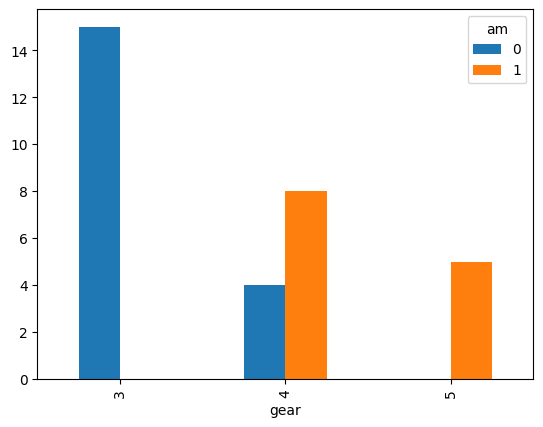

In [190]:
cross = pd.crosstab(mtcars['gear'], mtcars['am'])
cross.plot.bar()

In [198]:
for i in cross.items():
    print(i)

(0, gear
3    15
4     4
5     0
Name: 0, dtype: int64)
(1, gear
3    0
4    8
5    5
Name: 1, dtype: int64)


## 데이터셋에 포함된 모든 features의 히스토그램 그리기

array([[<Axes: title={'center': 'mpg'}>, <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'disp'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'drat'}>,
        <Axes: title={'center': 'wt'}>],
       [<Axes: title={'center': 'qsec'}>, <Axes: title={'center': 'vs'}>,
        <Axes: title={'center': 'am'}>],
       [<Axes: title={'center': 'gear'}>,
        <Axes: title={'center': 'carb'}>, <Axes: >]], dtype=object)

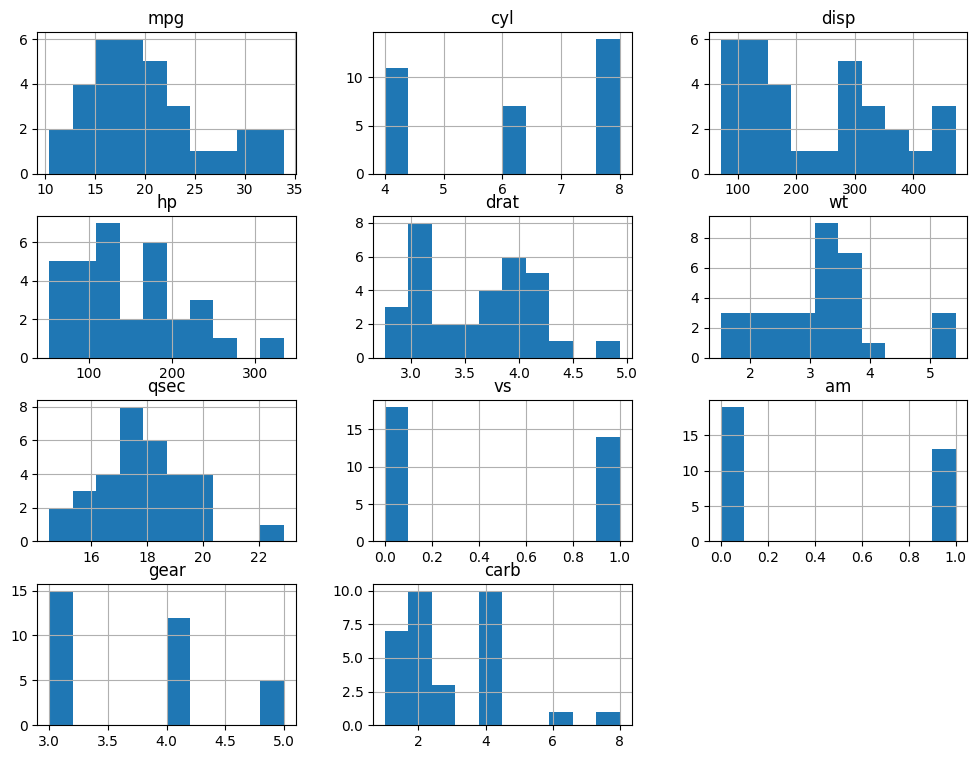

In [154]:
mtcars.hist(figsize=(12, 9))

## Cylinder vs Horse Power scatter chart

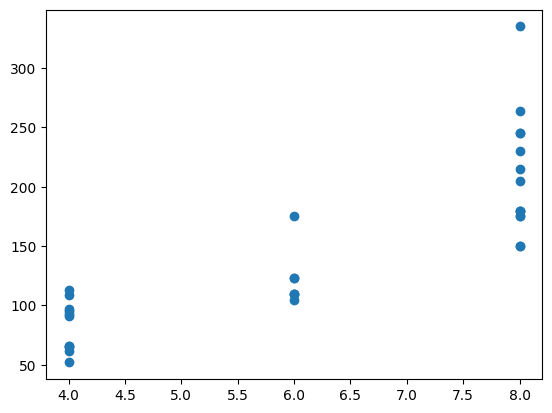

In [155]:
scatter_x, scatter_y = mtcars['cyl'], mtcars['hp']
plt.scatter(scatter_x, scatter_y)

## MPG vs Horse Power scatter chart

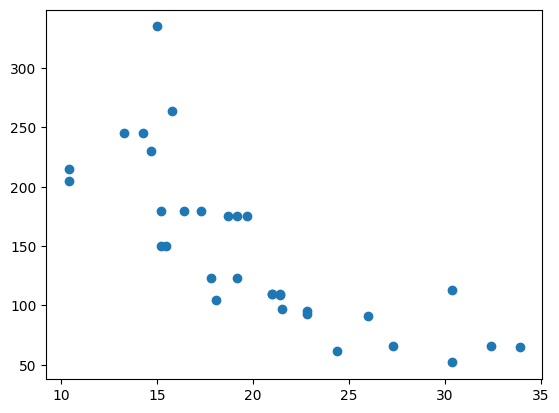

In [156]:
scatter_x, scatter_y = mtcars['mpg'], mtcars['hp']
plt.scatter(scatter_x, scatter_y)

## 각 변수들의 상관 관계를 알아보기 위한 상관계수 표

<Axes: >

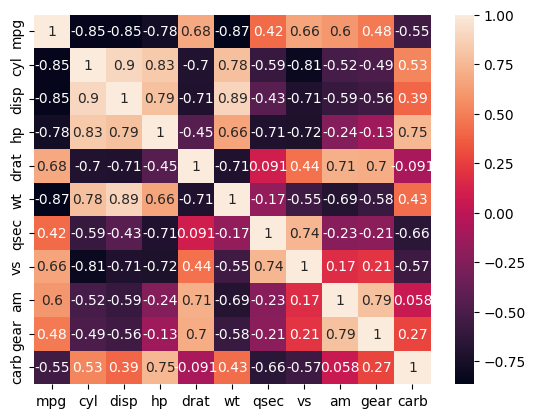

In [176]:
mtcars
dropped_mtcars = mtcars.drop(columns=['model'])
a = dropped_mtcars.corr()
sns.heatmap(a, annot=True)
